### Example 

* Suppose we have two samples that represent Biki ride durations for two distinct neighborhoods `a` and `b`

* Instead of working with actual data, sample the data for the two neighborhoods from a gaussian with a mean ($\mu=20$) the a standard deviation ($\sigma = 4$)
    * We will sample 15 bike rides for each of regions `a` and `b`
    * In our scenario, this amounts to measuring the duration of 30 bike rides

In [48]:
# Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
np.random.seed(0)
region_a = np.random.normal(20, 4, 15)
region_b = np.random.normal(20, 4, 15)
print('The mean of dataset a is', np.mean(region_a))
print('The mean of dataset b is', np.mean(region_b))
print('Difference between means is', np.mean(region_a) - np.mean(region_b) )
print('I believe there is no statistically significant difference between a and b')

The mean of dataset a is 22.748033269279322
The mean of dataset b is 20.794818308826077
Difference between means is 1.953214960453245
I believe there is no statistically significant difference between a and b


### Example - cont'd

2. Compute and compare the means of datasets `a` `b`
  * Based on the observed difference between the means, do you believe there is a statistically significant difference between samples `a` and `b`

### Example - cont'd

3. draw the two KDEs reprenting the datasets `a` and `b`
  * You should have a figure that appears "approximately" as in the figure below
    * The X- and Y-axis values have been intentionally omitted
    
![](https://www.dropbox.com/s/0ab4d92lkcn89jv/a_b_kde_exmaple.png?dl=1)    

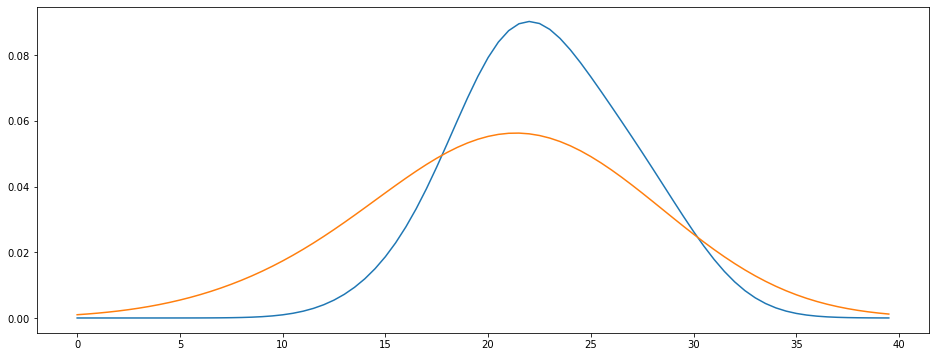

In [41]:
# Write your code here
import scipy.stats as stats
x_axis = np.arange(0,40,0.5)
kde_a = sp.stats.gaussian_kde(region_a, bw_method=0.8)
kde_b = sp.stats.gaussian_kde(region_b, bw_method=1)
x_densities_a = kde_a.evaluate(x_axis)
x_densities_b = kde_b.evaluate(x_axis)
plt.figure(figsize=(16,6))
plt.plot(x_axis, x_densities_a, label="dataset a")
plt.plot(x_axis, x_densities_b, label="dataset b")

### Example - cont'd

4. Visually, does dataset *a* differ significantly from dataset `b`

In [58]:
# Write your code here 
print('Visually, dataset a is slightly different from dataset b')

Visually, dataset a is slightly different from dataset b


### Example - cont'd

5. Use the resampling method covered in class to test whether or not there is a statistically significant difference between datasets `a` and `b`
 * Provide a p-value to support your claim.


1.953214960453245


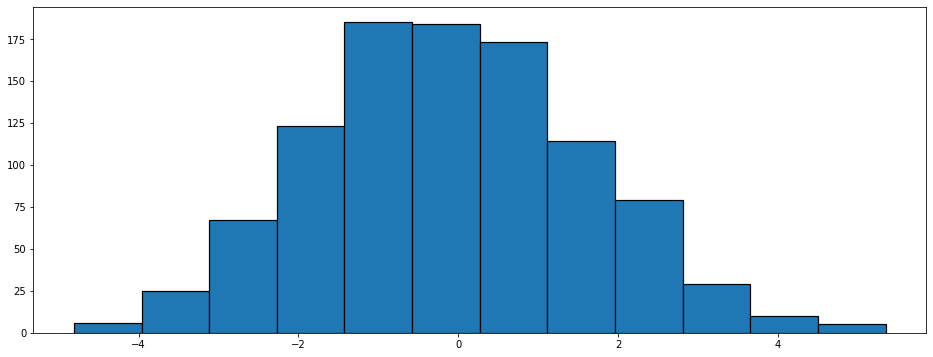

In [43]:
# Write your code here 
diff_of_means = np.mean(region_a) - np.mean(region_b)
print(diff_of_means)
plt.figure(figsize=(16,6))

data = np.concatenate([region_a,region_b])
means_difference = []

for _ in range(1000):
    np.random.shuffle(data)
    a_subset = data[:20]
    b_subset = data[20:]
    means_difference.append(np.mean(a_subset) - np.mean(b_subset))
    
_ = plt.hist(means_difference, edgecolor='k', linewidth=1.2, bins=12)
plt.scatter(np.mean(region_a) - np.mean(region_b), 0, color = "red", s=40)

### Example - cont'd

6. Plot a histogram of the means obtained during resampling and the observed value. 
  * You should have a figure that appears "approximately" as in the figure below
![](https://www.dropbox.com/s/g54bal23o1ktj2j/a_b_hist_example.png?dl=1)  

In [57]:
# Write your code here 
p_value = sum(means_difference >= (np.mean(region_a) - np.mean(region_b)))/ len(means_difference) 
print('The p-value is', p_value * 100, '%, which is greater than 5%. So there is no statistically significant difference between a and b ')

The p-value is 12.3 %, which is greater than 5%. So there is no statistically significant difference between a and b 
